Dataset URL: https://www.kaggle.com/datasets/vijayuv/onlineretail


100%|██████████| 7.20M/7.20M [00:00<00:00, 712MB/s]

 Initial shape: (541909, 8)
 Missing values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
 After cleaning shape: (392692, 8)


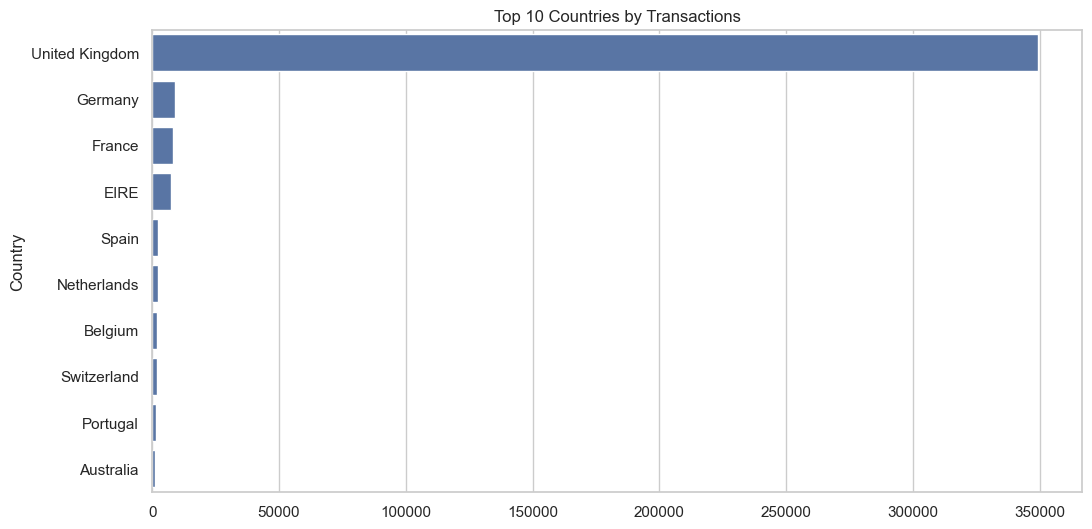

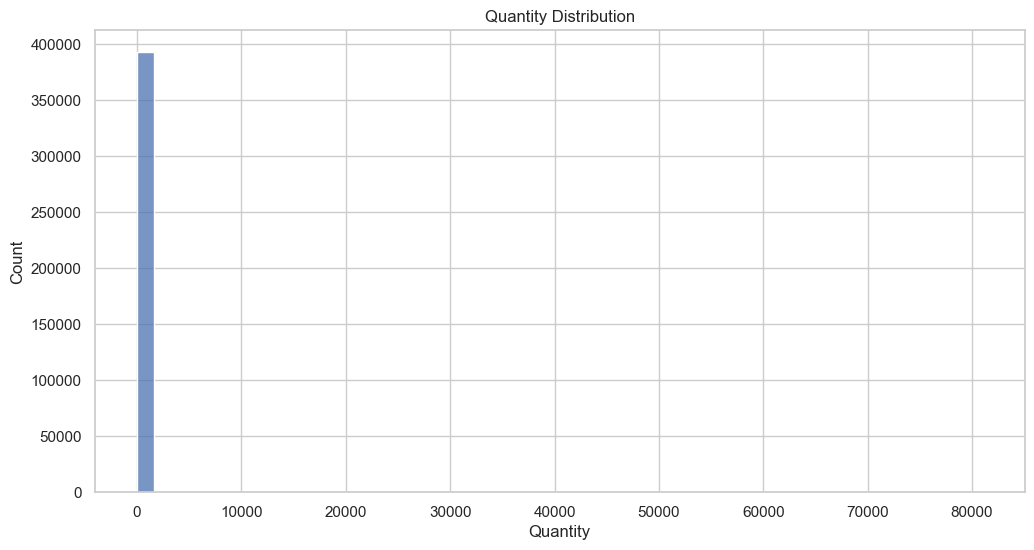

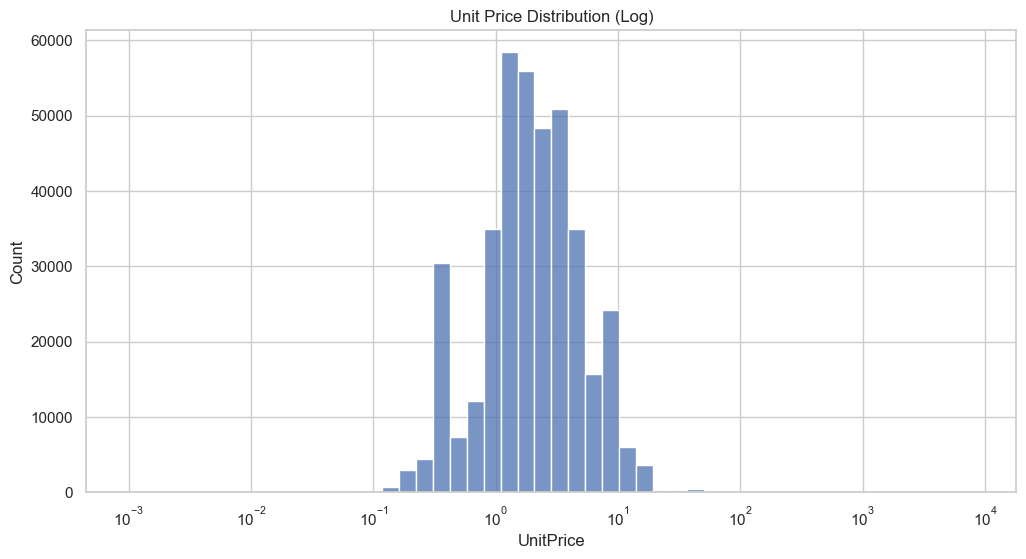

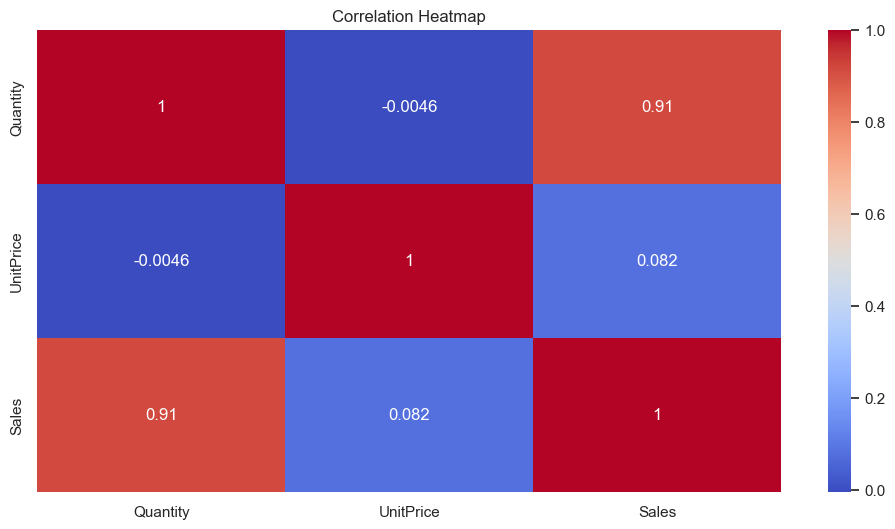

C:\Users\jared\AppData\Local\Temp\ipykernel_40408\2040092111.py:61: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('InvoiceDate').resample('M')['Sales'].sum()  # Resample monthly sales


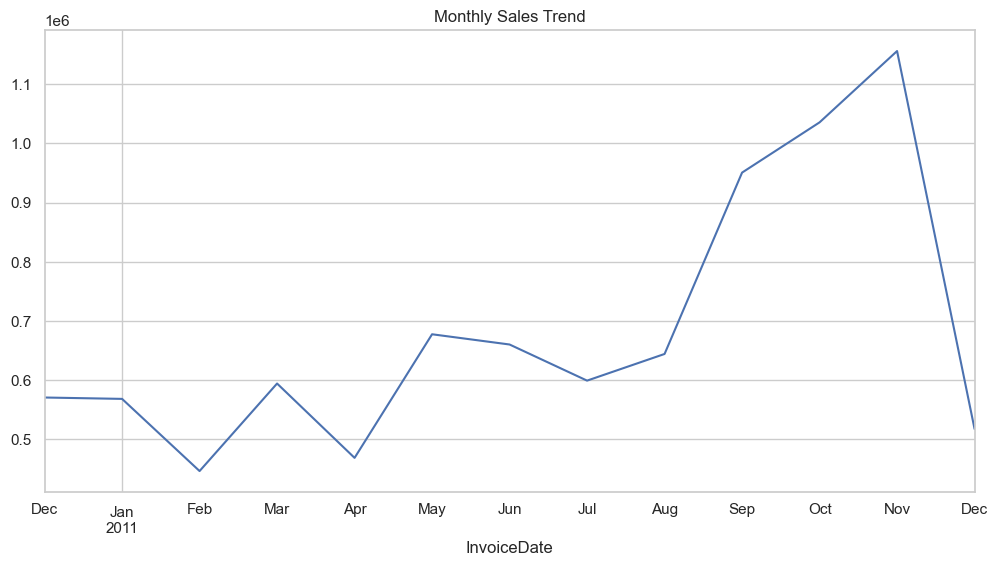


Key Insights:
1. UK drives the majority of transactions.
2. Quantity & price distributions are right-skewed with outliers.
3. Removing cancelled or negative orders improved data quality.
4. Clear seasonality in monthly sales.


In [2]:
# Import required libraries
import os                              # For interacting with the operating system (e.g., file paths)
import zipfile                         # To handle zip files (not used in the final code)
import pandas as pd                    # For data manipulation and analysis
import seaborn as sns                  # For creating visualizations
import matplotlib.pyplot as plt        # For plotting graphs
import kaggle                          # For downloading datasets from Kaggle API

# Configure seaborn and matplotlib visuals
sns.set(style="whitegrid")             # Set whitegrid theme for better readability
plt.rcParams["figure.figsize"] = (12, 6)  # Set default figure size for all plots

# Step A: Download & unzip dataset using Kaggle API
kaggle.api.dataset_download_files('vijayuv/onlineretail', path='data', unzip=True, quiet=False)  
# Downloads the dataset from Kaggle and unzips it into a folder named 'data'

# Step B: Load CSV
csv_path = os.path.join('data', 'OnlineRetail.csv')  # Define the file path
df = pd.read_csv(csv_path, encoding='ISO-8859-1')    # Load CSV using appropriate encoding for special characters

# Display initial shape and missing values
print(" Initial shape:", df.shape)                 # Print number of rows and columns before cleaning
print(" Missing values:\n", df.isnull().sum())     # Print number of missing values for each column

# Step C: Cleaning

df.dropna(subset=['CustomerID'], inplace=True)       # Remove rows where 'CustomerID' is missing
df.drop_duplicates(inplace=True)                     # Remove duplicate rows
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')  # Convert InvoiceDate to datetime format
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]  # Exclude credit notes (cancelled invoices)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]       # Keep only positive Quantity and UnitPrice
print(" After cleaning shape:", df.shape)          # Show shape after cleaning

# Step D: Feature engineering
df['Sales'] = df['Quantity'] * df['UnitPrice']       # Create a new column 'Sales' as Quantity x UnitPrice

# Step E: Exploratory Data Analysis (EDA)

# Top 10 countries by number of transactions
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)  # Bar plot of top countries
plt.title("Top 10 Countries by Transactions")
plt.show()

# Distribution of quantity sold
sns.histplot(df['Quantity'], bins=50, kde=False)
plt.title("Quantity Distribution")
plt.show()

# Distribution of unit price (log scale to reduce skewness visibility)
sns.histplot(df['UnitPrice'], bins=50, log_scale=True)
plt.title("Unit Price Distribution (Log)")
plt.show()

# Heatmap showing correlation between numerical columns
sns.heatmap(df[['Quantity', 'UnitPrice', 'Sales']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Monthly sales trend
monthly = df.set_index('InvoiceDate').resample('M')['Sales'].sum()  # Resample monthly sales
monthly.plot()
plt.title("Monthly Sales Trend")
plt.show()

# Step F: Insights
print("""\nKey Insights:
1. UK drives the majority of transactions.
2. Quantity & price distributions are right-skewed with outliers.
3. Removing cancelled or negative orders improved data quality.
4. Clear seasonality in monthly sales.""")


| Step | Cleaning Action                                        | Explanation                                                                                                                                                                |
| ---- | ------------------------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1️  | `df.dropna(subset=['CustomerID'])`                     | Rows without a `CustomerID` cannot be used for customer-level analysis, so they are removed. This improves the quality of downstream segmentation or behavioral analytics. |
| 2️  | `df.drop_duplicates()`                                 | Duplicate transactions may exist due to system errors or data entry issues. Removing them avoids double-counting and improves accuracy.                                    |
| 3️  | `df['InvoiceDate'] = pd.to_datetime(...)`              | Ensures date values are in proper `datetime` format for resampling and time-based operations. Errors are coerced to `NaT` (null), which can be filtered if needed.         |
| 4️  | `df[~df['InvoiceNo'].astype(str).str.startswith('C')]` | Excludes cancelled orders (credit notes) where the invoice number starts with `'C'`. These represent returns or voided transactions.                                       |
| 5️  | `df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]`     | Filters out rows with negative or zero `Quantity` and `UnitPrice`. These are often due to refunds, promotions, or data entry errors, and they distort sales analysis.      |
